# Plotting Tutorial

This tutorial demonstrates how to use the plotting capabilities of the ``AFL.double_agent`` package to visualize compositional and scattering data.

## Introduction

The ``AFL.double_agent.plotting`` module provides a variety of plotting functions for visualizing materials data. It supports:

- Compositional data visualization (scatter and surface plots)
- Small-angle scattering data visualization
- Both 2D and 3D plots
- Ternary plots for three-component systems
- Multiple backends (Matplotlib and Plotly)

In this tutorial, we'll explore these capabilities using example datasets.


## Google Colab Setup

Only uncomment and run the next cell if you are running this notebook in Google Colab or if don't already have the AFL-agent package installed.

In [ ]:
# !pip install git+https://github.com/usnistgov/AFL-agent.git

Comment out the next two lines if running in a Colab or a local Jupyter instance. The documentation generation software (nbsphinx) is struggling with the interactive plotly plots.

In [1]:
import plotly.io as pio

# Use static PNG rendering (limits interactivity but avoids widget issues)
pio.renderers.default = "svg"

General Setup
-------------

First, let's import the necessary modules and load our example dataset:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Import the plotting module
from AFL.double_agent.plotting import plot, plot_scatter_mpl, plot_surface_mpl, plot_sas_mpl
from AFL.double_agent.plotting import plot_scatter_plotly, plot_surface_plotly, plot_sas_plotly

# Load the example dataset
from AFL.double_agent.data import example_dataset1

# Load the dataset
ds = example_dataset1()

# Display the dataset structure
ds

<xarray.Dataset> Size: 164kB
Dimensions:              (sample: 100, component: 2, x: 150, grid: 2500)
Coordinates:
  * component            (component) <U1 8B 'A' 'B'
  * x                    (x) float64 1kB 0.001 0.001047 0.001097 ... 0.9547 1.0
Dimensions without coordinates: sample, grid
Data variables:
    composition          (sample, component) float64 2kB ...
    ground_truth_labels  (sample) int64 800B ...
    measurement          (sample, x) float64 120kB ...
    composition_grid     (grid, component) float64 40kB ...

The example dataset contains compositional data and measurements that we can use for our plots.

## Compositional Data Visualization

### Scatter Plots

Let's start with a simple scatter plot of our compositional data using Matplotlib:

<Figure size 800x600 with 0 Axes>

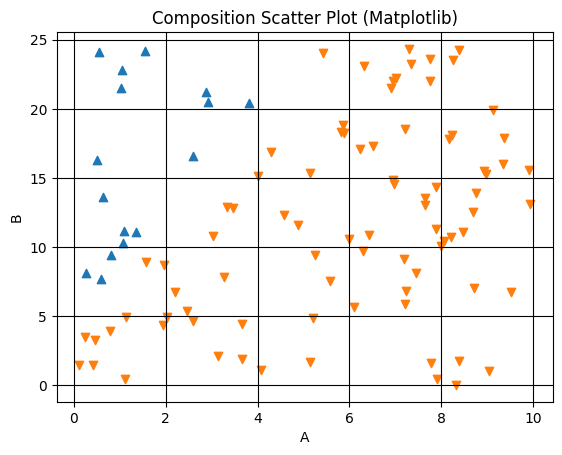

In [3]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(8, 6))
artists = plot_scatter_mpl(
    dataset=ds,
    component_variable='composition',
    labels='ground_truth_labels',
    discrete_labels=True
)
plt.title('Composition Scatter Plot (Matplotlib)')
plt.show()


We can also create the same plot using the unified ``plot`` function:


<Figure size 800x600 with 0 Axes>

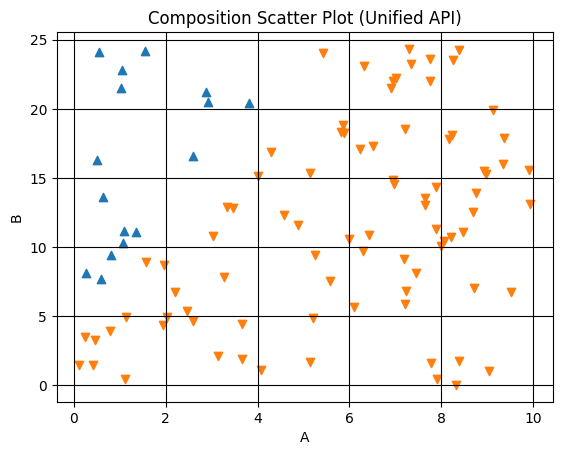

In [4]:
# Create a scatter plot using the unified plot function
plt.figure(figsize=(8, 6))
artists = plot(
    dataset=ds,
    kind='scatter',
    backend='mpl',
    component_variable='composition',
    labels='ground_truth_labels',
    discrete_labels=True
)
plt.title('Composition Scatter Plot (Unified API)')
plt.show()



Now, let's create an interactive scatter plot using Plotly. Note that the plot will not be interactive in the html documentation but, if you restart your kernel and comment out `pio.renderers.default = "png"` at the top of the notebook, it will be interactive. 

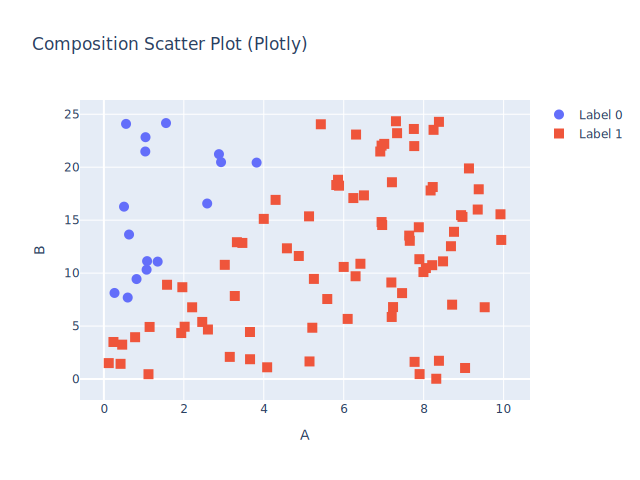

In [5]:
# Create a scatter plot using Plotly
fig = plot_scatter_plotly(
    dataset=ds,
    component_variable='composition',
    labels='ground_truth_labels',
    discrete_labels=True
)
fig.update_layout(title='Composition Scatter Plot (Plotly)')
fig.show()


## Surface Plots

Surface plots are useful for visualizing continuous fields over compositional space:

<Figure size 800x600 with 0 Axes>

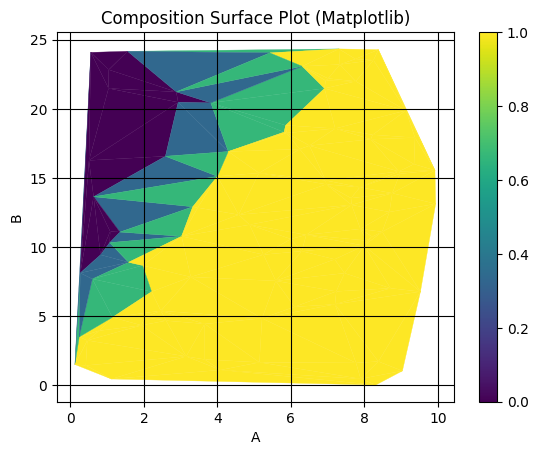

In [6]:
# Create a surface plot using Matplotlib
plt.figure(figsize=(8, 6))
artists = plot_surface_mpl(
    dataset=ds,
    component_variable='composition',
    labels='ground_truth_labels'
)
plt.colorbar(artists)
plt.title('Composition Surface Plot (Matplotlib)')
plt.show()

And with Plotly:

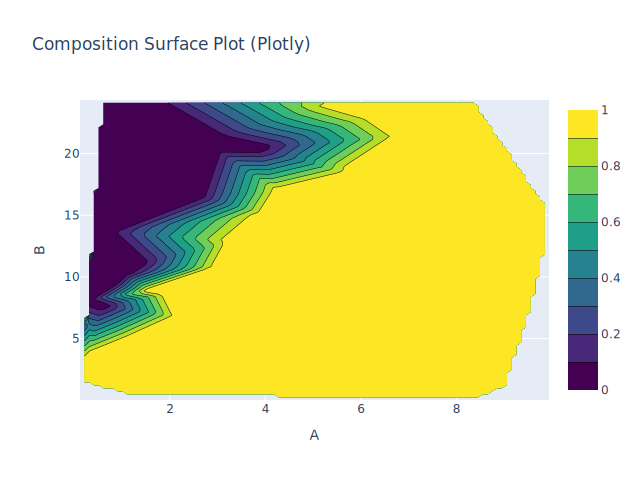

In [7]:
# Create a surface plot using Plotly
fig = plot_surface_plotly(
    dataset=ds,
    component_variable='composition',
    labels='ground_truth_labels'
)
fig.update_layout(title='Composition Surface Plot (Plotly)')
fig.show()


## Small-Angle Scattering Data Visualization

The ``measurement`` variable in our dataset can be treated as scattering data for demonstration purposes.

### Log-Log Plots

Log-log plots are commonly used for scattering data:


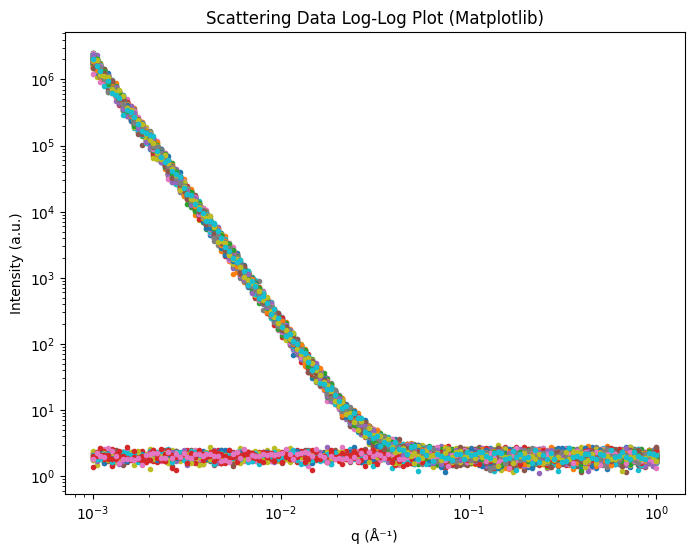

In [8]:
# Create a log-log plot using Matplotlib
plt.figure(figsize=(8, 6))
artists = plot_sas_mpl(
    dataset=ds,
    plot_type='loglog',
    x='x',
    y='measurement',
    xlabel='q (Å⁻¹)',
    ylabel='Intensity (a.u.)',
    legend=False,
)
plt.title('Scattering Data Log-Log Plot (Matplotlib)')
plt.show()



And with Plotly:


In [9]:
# Create a log-log plot using Plotly
fig = plot_sas_plotly(
    dataset=ds,
    plot_type='loglog',
    x='x',
    y='measurement',
    xlabel='q (Å⁻¹)',
    ylabel='Intensity (a.u.)'
)
fig.update_layout(title='Scattering Data Log-Log Plot (Plotly)')
fig.show()



### Waterfall Plots

Waterfall plots are useful for comparing multiple scattering curves:


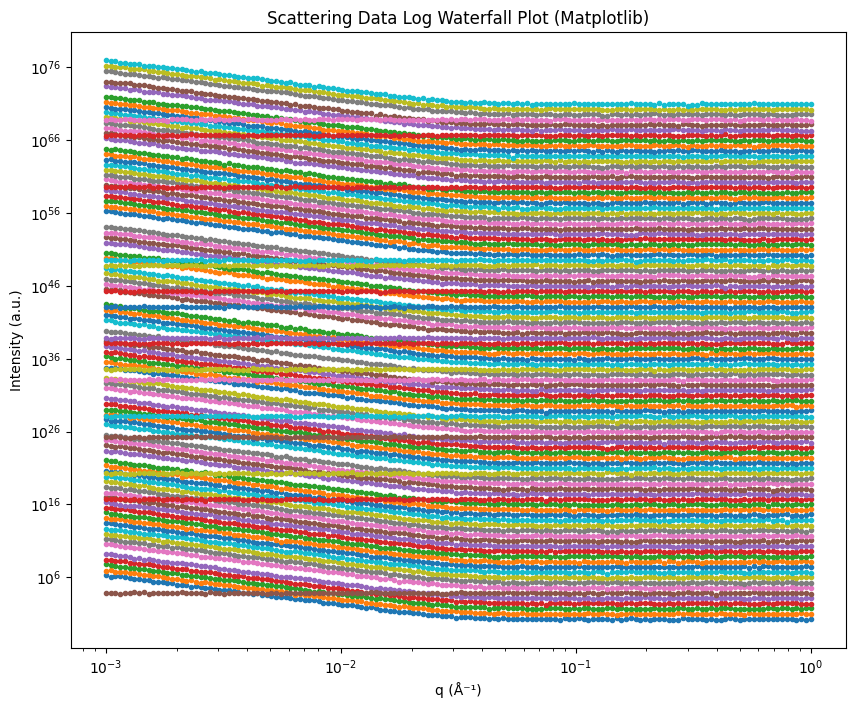

In [10]:
# Create a log waterfall plot using Matplotlib
plt.figure(figsize=(10, 8))
artists = plot_sas_mpl(
    dataset=ds,
    plot_type='logwaterfall',
    x='x',
    y='measurement',
    xlabel='q (Å⁻¹)',
    ylabel='Intensity (a.u.)',
    base=5, # Separation factor between curves
    legend=False,
)
plt.title('Scattering Data Log Waterfall Plot (Matplotlib)')
plt.show()



And with Plotly:


In [11]:
# Create a log waterfall plot using Plotly
fig = plot_sas_plotly(
    dataset=ds,
    plot_type='logwaterfall',
    x='x',
    y='measurement',
    xlabel='q (Å⁻¹)',
    ylabel='Intensity (a.u.)',
    base=5  # Separation factor between curves
)
fig.update_layout(title='Scattering Data Log Waterfall Plot (Plotly)')
fig.show()


### Linear Plots

For some data, linear plots might be more appropriate:


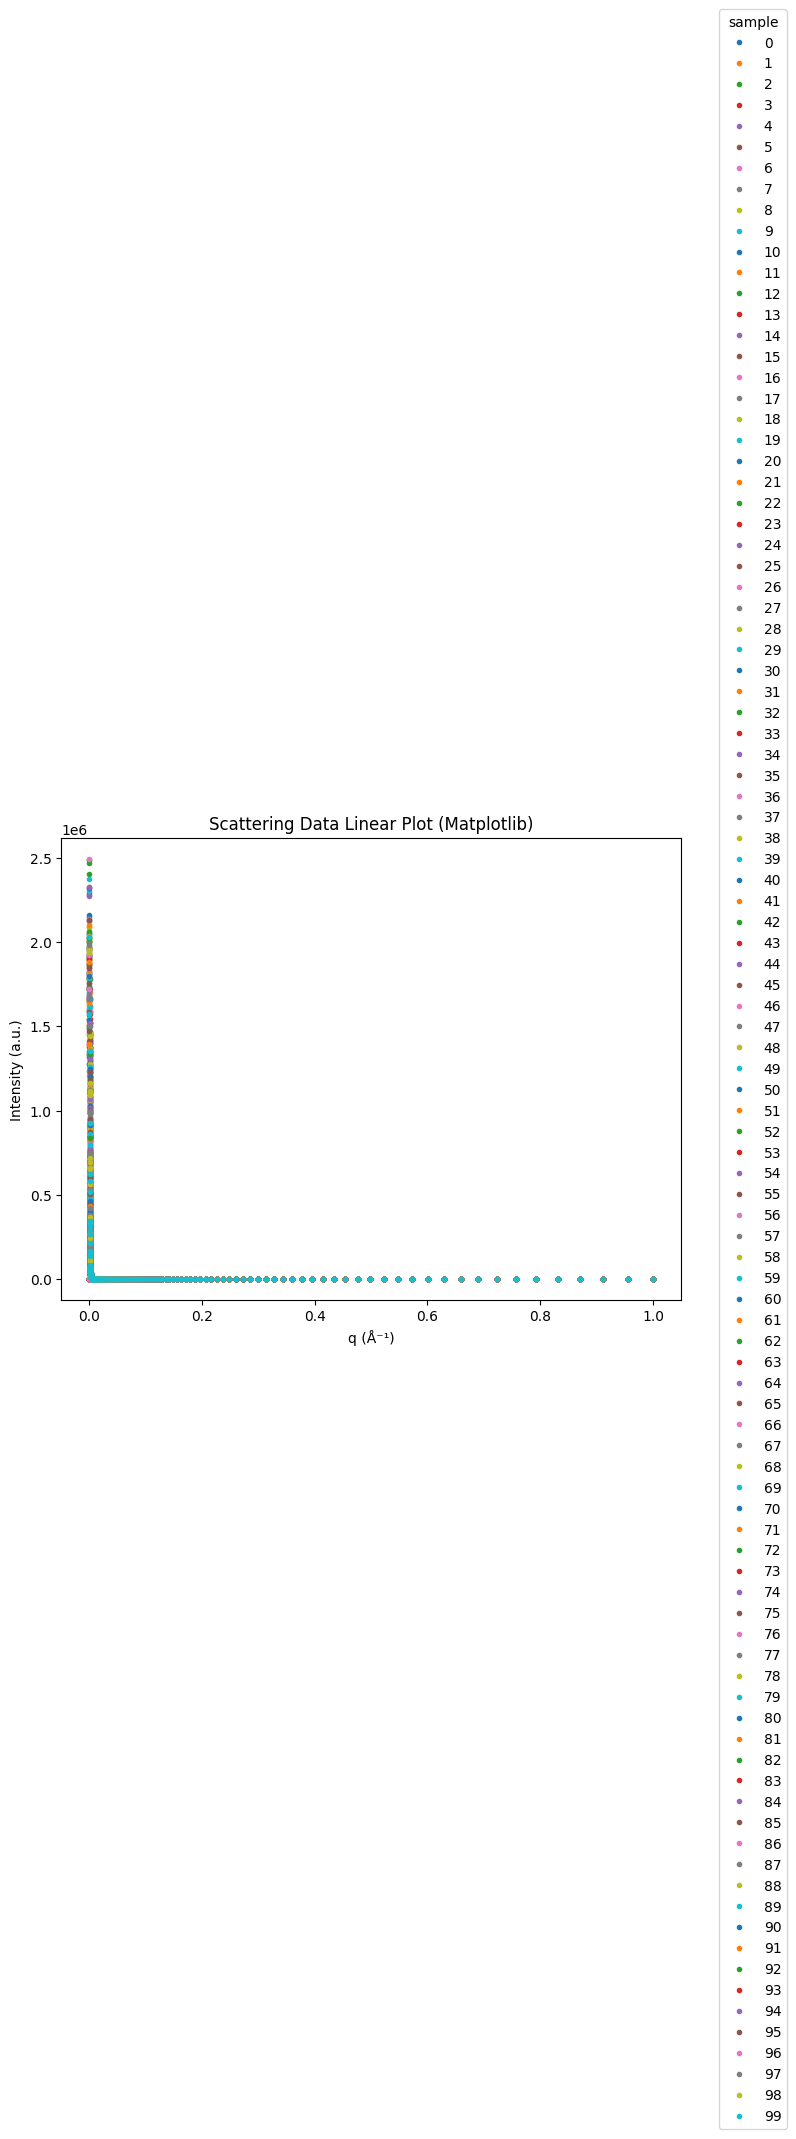

In [12]:
# Create a linear plot using Matplotlib
plt.figure(figsize=(8, 6))
artists = plot_sas_mpl(
    dataset=ds,
    plot_type='linlin',
    x='x',
    y='measurement',
    xlabel='q (Å⁻¹)',
    ylabel='Intensity (a.u.)'
)
plt.title('Scattering Data Linear Plot (Matplotlib)')
plt.show()


## Advanced Features

### 3D Plots for Three-Component Systems

For three-component systems, we can create 3D plots:


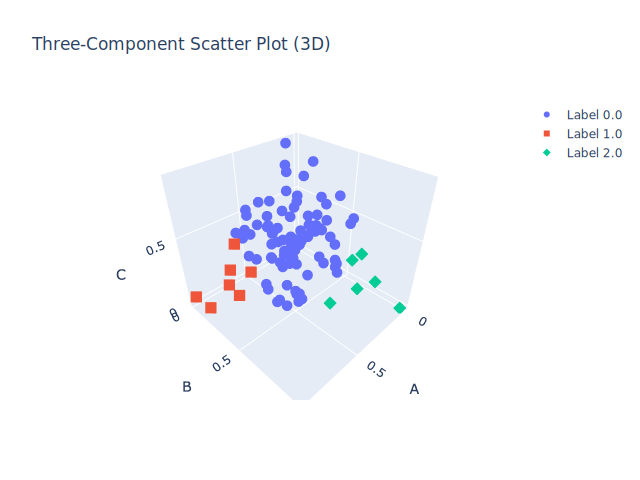

In [13]:
# Create a synthetic three-component dataset
n_samples = 100
components = np.random.random((n_samples, 3))
# Normalize to sum to 1
components = components / components.sum(axis=1, keepdims=True)

# Create labels
labels = np.zeros(n_samples)
labels[components[:, 0] > 0.6] = 1
labels[components[:, 1] > 0.6] = 2

# Create the dataset
three_comp_ds = xr.Dataset(
    data_vars={
        'compositions': (['sample', 'component'], components)
    },
    coords={
        'component': ['A', 'B', 'C'],
        'labels': (['sample'], labels)
    }
)

# Create a 3D scatter plot (non-ternary)
fig = plot_scatter_plotly(
    dataset=three_comp_ds,
    component_variable='compositions',
    labels='labels',
    discrete_labels=True,
    ternary=False  # Use 3D Cartesian plot instead of ternary
)
fig.update_layout(title='Three-Component Scatter Plot (3D)')
fig.show()


### Ternary Plots

For three-component systems, ternary plots are often more intuitive:

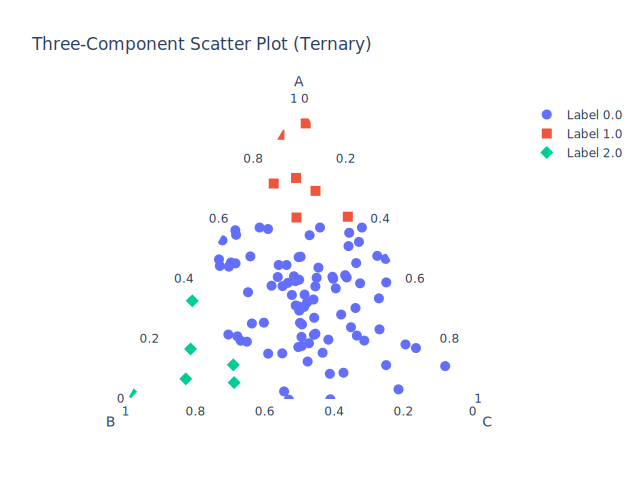

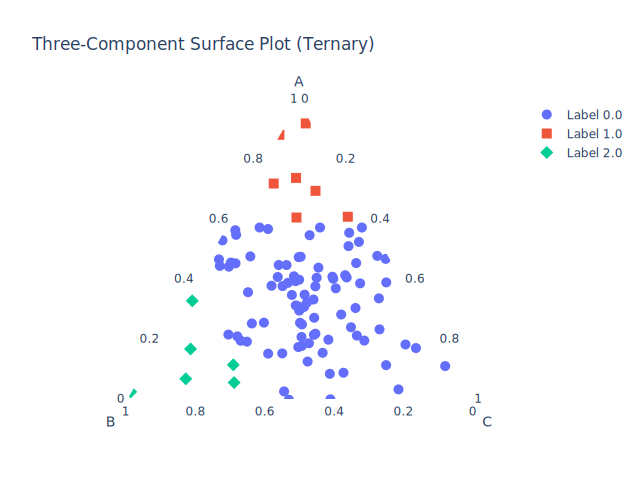

In [14]:
fig = plot_scatter_plotly(
    dataset=three_comp_ds,
    component_variable='compositions',
    labels='labels',
    discrete_labels=True,
    ternary=True  # Use ternary plot
)
fig.update_layout(title='Three-Component Scatter Plot (Ternary)')
fig.show()

fig.update_layout(title='Three-Component Surface Plot (Ternary)')
fig.show()

Conclusion
---------

In this tutorial, we've explored the plotting capabilities of the ``AFL.double_agent`` package. We've seen how to:

- Create scatter and surface plots for compositional data
- Visualize small-angle scattering data with various plot types
- Work with both 2D and 3D plots
- Create ternary plots for three-component systems
- Use both Matplotlib and Plotly backends
- Customize plots to suit specific needs

The unified ``plot`` function provides a convenient interface to all these capabilities, making it easy to switch between plot types and backends.

For more details on the available plotting functions and their parameters, refer to the API documentation.